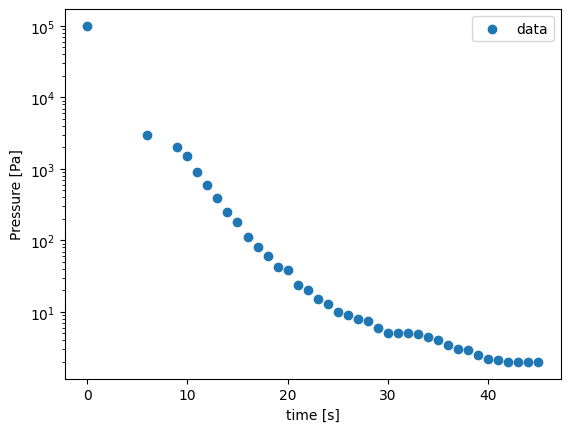

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_df_b_s = pd.read_csv('油回転ポンプ実験b/油回転ポンプ.csv')

fig,ax = plt.subplots()
ax.scatter(data_df_b_s['second'],data_df_b_s['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')
ax.legend()
plt.show()



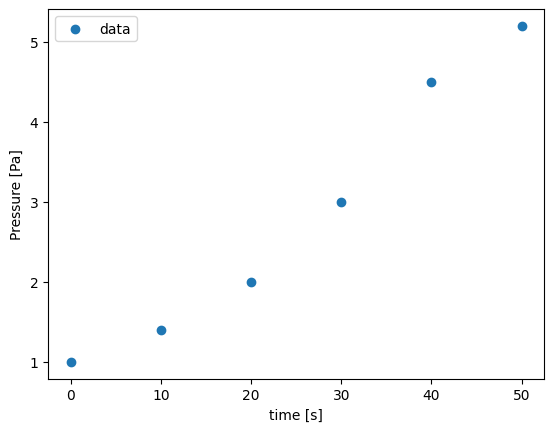

0.00029776007989279604


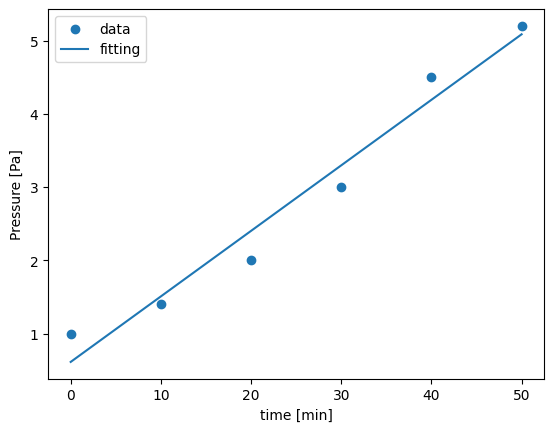

In [17]:
import pandas as pd
data_df_b_q = pd.read_csv('油回転ポンプ実験b/Q_油回転ポンプ.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_b_q['mintues'],data_df_b_q['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.legend()
plt.show()
D = 4.8 * 10**(-2) # [m]
L = 0.46 # [m]

V = D**2 * np.pi * L # [m^3]


from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

popt, pcov = curve_fit(func,data_df_b_q['mintues'],data_df_b_q['Pa'])
print(popt[0] * V)

fig,ax = plt.subplots() 
ax.scatter(data_df_b_q['mintues'],data_df_b_q['Pa'],label='data')
ax.plot(data_df_b_q['mintues'],func(data_df_b_q['mintues'],*popt),label='fitting')
ax.set_xlabel('time [min]')
ax.set_ylabel('Pressure [Pa]')
# ax.set_yscale('log')
ax.legend()
plt.show()


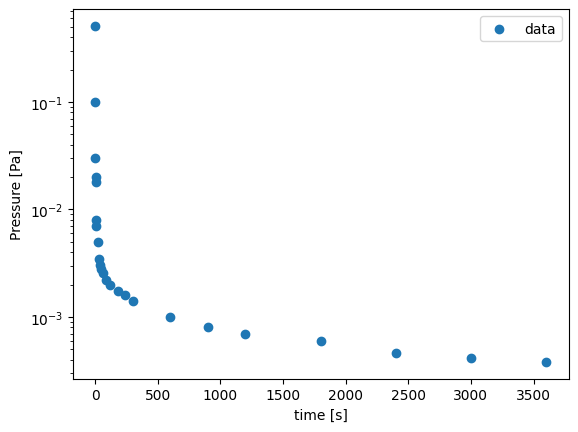

[0.00358668 0.28722322 0.90584253]


0.011592327217280164

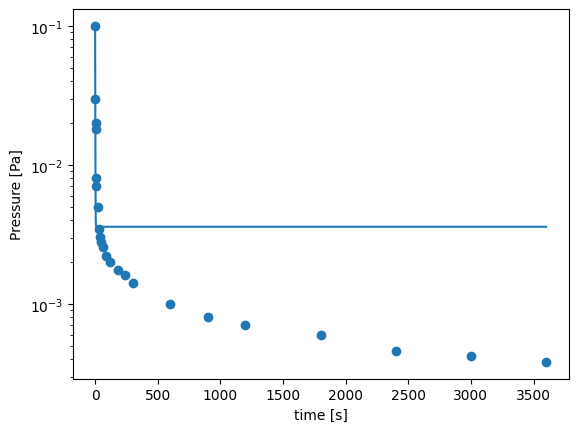

In [58]:
data_df_c_s = pd.read_csv('油拡散ポンプ実験c\油拡散ポンプによる排気.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c_s['second'],data_df_c_s['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')
ax.legend()
plt.show()

t = data_df_c_s['second'][1:]
P = data_df_c_s['Pa'][1:]

from scipy.optimize import curve_fit

def func(x,a,b,c):
    out = a + b*  np.exp(-x/c)
    return out 

popt, pcov = curve_fit(func,t,P)
print(popt)

fig,ax = plt.subplots()
ax.scatter(t,P,label='data')
ax.plot(t,func(t,*popt),label='fitting')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')

V/popt[1]  

[1.00021144e+00 1.47774417e-04 2.02430716e+02]


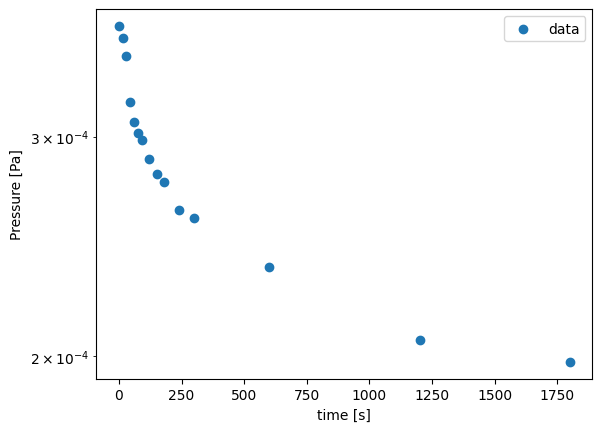

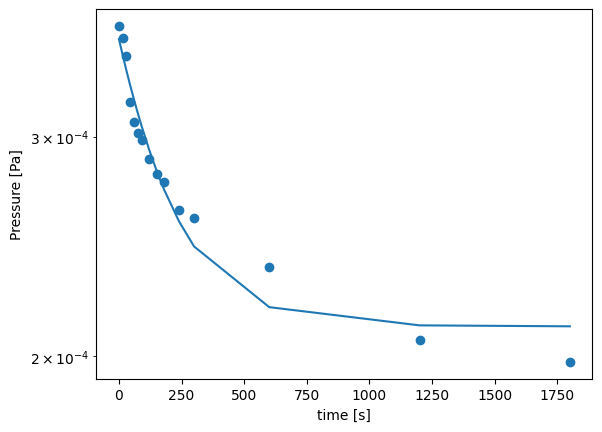

In [29]:
data_df_c_trap = pd.read_csv('油拡散ポンプ実験c/油拡散ポンプにトラップ.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c_trap['second'],data_df_c_trap['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')
ax.legend()

t = data_df_c_trap['second']
P = data_df_c_trap['Pa']

from scipy.optimize import curve_fit

def func(x,a,b,c):
    out = np.log(a + b* np.exp(-x/c))
    return out 

popt, pcov = curve_fit(func,t,P,p0=[1,1,1])
print(popt)

fig,ax = plt.subplots()
ax.scatter(t,P,label='data')
ax.plot(t,func(t,*popt),label='fitting')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')


[ 0.00028884 -0.0045982 ]


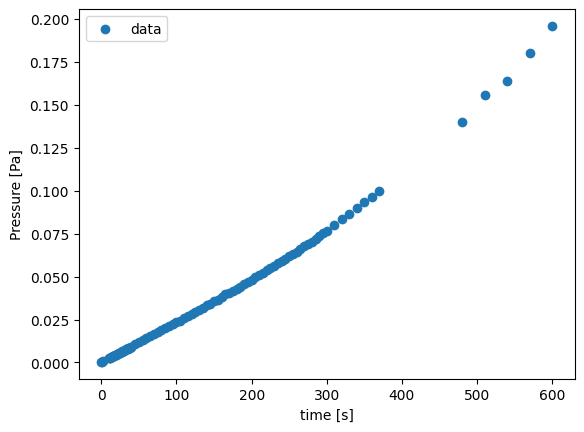

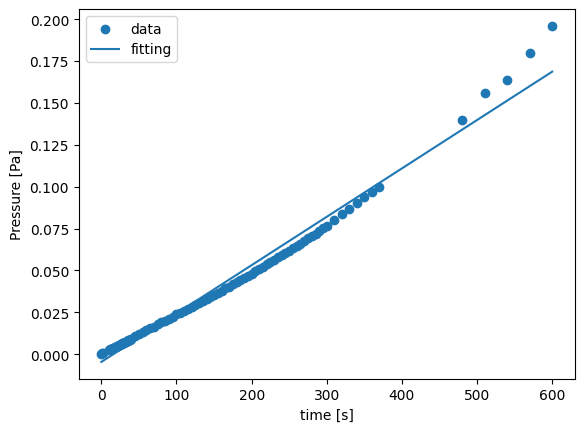

In [46]:
data_df_c_q = pd.read_csv('油拡散ポンプ実験c/油拡散ポンプによるガス放出率.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c_q['second'],data_df_c_q['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
# ax.set_yscale('log')
ax.legend()


# ガス放出率を求める
from scipy.optimize import curve_fit

def func(x,a,b):
    out = a * x + b
    return out

popt, pcov = curve_fit(func,data_df_c_q['second'],data_df_c_q['Pa'])
print(popt)

fig,ax = plt.subplots()
ax.scatter(data_df_c_q['second'],data_df_c_q['Pa'],label='data')
ax.plot(data_df_c_q['second'],func(data_df_c_q['second'],*popt),label='fitting')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.legend()
plt.show()
